In [1]:
import mido
import numpy as np
import matplotlib.pyplot as plt
import PreProcessor as pp

In [2]:
dataset = pp.load_dataset("adl-piano-midi")
ReggaeSongs = pp.files_to_songs(dataset["Reggae"])

channel_to_ind, ind_to_channel, note_to_ind, ind_to_note, velocity_to_ind, ind_to_velocity, tick_to_ind, ind_to_tick = pp.dicts_from_songs(ReggaeSongs)

n_Channels = len(channel_to_ind)
n_Notes = len(note_to_ind)
n_Velocities = len(velocity_to_ind)
n_Ticks = len(tick_to_ind)

print("Number of channels  :",n_Channels,"\nNumber of notes     :",n_Notes,"\nNumber of velocities:",n_Velocities,"\nNumber of time ticks:",n_Ticks)

Number of channels  : 7 
Number of notes     : 79 
Number of velocities: 115 
Number of time ticks: 525


In [3]:
seq_length = 15
n_batch = 10
BuffaloSoldier = ReggaeSongs["adl-piano-midi\\Reggae\\Reggae\\Bob Marley  The Wailers\\Buffalo Soldier.mid"]
BSNotes = BuffaloSoldier[:,1]
OneHotBSNotes = pp.one_hot_encode(note_to_ind,BSNotes)
X_train_BS, y_train_BS = pp.label_sequences(OneHotBSNotes,seq_length,n_batch)
print(X_train_BS.shape)

(230, 15, 79)


In [4]:
AllNotes = np.array([])
for song in ReggaeSongs.values():
    AllNotes = np.append(AllNotes,song[:,1])
OneHotNotes = pp.one_hot_encode(note_to_ind,AllNotes)
X_train, y_train = pp.label_sequences(OneHotNotes,seq_length,n_batch)
print(X_train.shape)

(4310, 15, 79)


In [5]:
from keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Softmax
from keras import optimizers

In [101]:
##Simple RNN model
dim = 100
n_epochs = 200
NotesModel = Sequential()
NotesModel.add(SimpleRNN(units=dim, input_shape=(None,n_Notes), stateful=True, return_sequences=True, batch_input_shape=(n_batch, seq_length, n_Notes)))
NotesModel.add(Dense(units=n_Notes, activation='softmax'))
NotesModel.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_27 (SimpleRNN)   (None, None, 100)         18000     
                                                                 
 dense_26 (Dense)            (None, None, 79)          7979      
                                                                 
Total params: 25,979
Trainable params: 25,979
Non-trainable params: 0
_________________________________________________________________


In [102]:
NotesModel.compile(optimizer=optimizers.Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])
NotesModel.fit(X_train_BS, y_train_BS, epochs=n_epochs, batch_size=n_batch, shuffle=False)


Epoch 1/200
23/23 [==============================] - 1s 5ms/step - loss: 2.4024 - accuracy: 0.3777
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 1.3947 - accuracy: 0.5884
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9891 - accuracy: 0.6974
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7320 - accuracy: 0.7742
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 0.7954
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5372 - accuracy: 0.8223
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.8388
Epoch 8/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4233 - accuracy: 0.8571
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8539
Epoch 10/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8583
Epoch 11/

23/23 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8397
Epoch 84/200
23/23 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.8470
Epoch 85/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8484
Epoch 86/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3788 - accuracy: 0.8557
Epoch 87/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8577
Epoch 88/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.8594
Epoch 89/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3812 - accuracy: 0.8554
Epoch 90/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4117 - accuracy: 0.8432
Epoch 91/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3988 - accuracy: 0.8455
Epoch 92/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3760 - accuracy: 0.8504
Epoch 93/200


23/23 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.7614
Epoch 165/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6234 - accuracy: 0.7725
Epoch 166/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5704 - accuracy: 0.7916
Epoch 167/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.7632
Epoch 168/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6166 - accuracy: 0.7751
Epoch 169/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5664 - accuracy: 0.7925
Epoch 170/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7983
Epoch 171/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.8064
Epoch 172/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5622 - accuracy: 0.7901
Epoch 173/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5144 - accuracy: 0.8064
Epoc

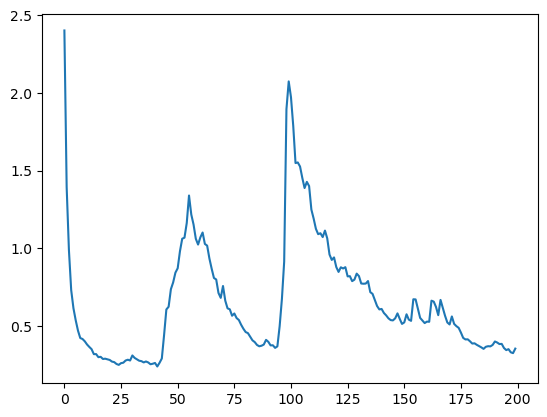

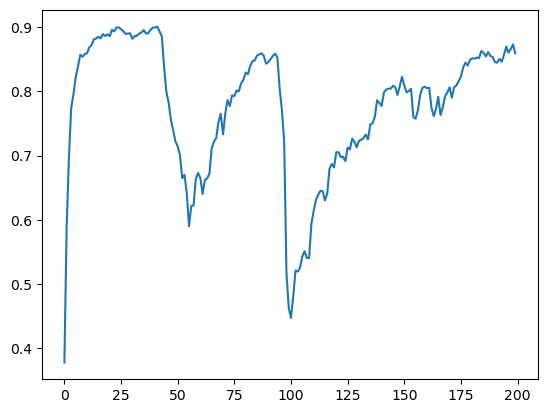

In [103]:
loss = NotesModel.history.history['loss']
accuracy = NotesModel.history.history['accuracy']
plt.figure()
plt.plot(range(len(loss)), loss)
plt.figure()
plt.plot(range(len(accuracy)), accuracy)

In [6]:
dataset = pp.load_dataset("adl-piano-midi")
ClassicSongs = pp.files_to_songs(dataset["Classical"])

channel_to_ind, ind_to_channel, note_to_ind, ind_to_note, velocity_to_ind, ind_to_velocity, tick_to_ind, ind_to_tick = pp.dicts_from_songs(ClassicSongs)

n_Channels = len(channel_to_ind)
n_Notes = len(note_to_ind)
n_Velocities = len(velocity_to_ind)
n_Ticks = len(tick_to_ind)

print("Number of channels  :",n_Channels,"\nNumber of notes     :",n_Notes,"\nNumber of velocities:",n_Velocities,"\nNumber of time ticks:",n_Ticks)

adl-piano-midi\Classical\Classical\Alexander Borodin\Nocturne.mid
adl-piano-midi\Classical\Classical\Antonio Salieri\Invention.mid
adl-piano-midi\Classical\Classical\Bela Bartok\Andante.mid
adl-piano-midi\Classical\Classical\Bela Bartok\Romanian Folk Dance.mid
adl-piano-midi\Classical\Classical\Claude Debussy\Clair De Lune.mid
adl-piano-midi\Classical\Classical\Franz Schubert\Impromptu in C-Moll.mid
adl-piano-midi\Classical\Classical\Franz Schubert\Impromptu in Ges-dur.mid
adl-piano-midi\Classical\Classical\Franz Schubert\Trois Marches militaires 3.mid
adl-piano-midi\Classical\Classical\Frederic Chopin\Prelude Op 28 No7.mid
adl-piano-midi\Classical\Classical\Giacomo Puccini\O Mio Babibino Caro.mid
adl-piano-midi\Classical\Classical\Jean-Baptiste Lully\Minuet.mid
adl-piano-midi\Classical\Classical\Johann Sebastian Bach\Aria, BWV 515.mid
adl-piano-midi\Classical\Classical\Johann Sebastian Bach\Aus meines Herzens Grunde (Chorale 1).mid
adl-piano-midi\Classical\Classical\Johann Sebastian B

In [20]:
seq_length = 30
n_batch = 100
AllNotes = np.array([])
for song in ReggaeSongs.values():
    AllNotes = np.append(AllNotes,song[:,1])
OneHotNotes = pp.one_hot_encode(note_to_ind,AllNotes)
X_train, y_train = pp.label_sequences(OneHotNotes,seq_length,n_batch)
print(X_train.shape)

(73700, 30, 105)


In [21]:
dim = 150
n_epochs = 5
NotesModel = Sequential()
NotesModel.add(SimpleRNN(units=dim, input_shape=(None,n_Notes), return_sequences=True, batch_input_shape=(n_batch, seq_length, n_Notes)))
NotesModel.add(Dense(units=n_Notes, activation='softmax'))
NotesModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (100, 30, 150)            38400     
                                                                 
 dense_4 (Dense)             (100, 30, 105)            15855     
                                                                 
Total params: 54,255
Trainable params: 54,255
Non-trainable params: 0
_________________________________________________________________


In [22]:
NotesModel.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
NotesModel.fit(X_train, y_train, epochs=n_epochs, batch_size=n_batch)

Epoch 1/5
737/737 [==============================] - 22s 25ms/step - loss: 3.3651 - accuracy: 0.1329
Epoch 2/5
737/737 [==============================] - 18s 25ms/step - loss: 3.0517 - accuracy: 0.1860
Epoch 3/5
737/737 [==============================] - 18s 24ms/step - loss: 2.9914 - accuracy: 0.1991
Epoch 4/5
737/737 [==============================] - 18s 24ms/step - loss: 2.9548 - accuracy: 0.2066
Epoch 5/5
737/737 [==============================] - 18s 25ms/step - loss: 2.9279 - accuracy: 0.2118


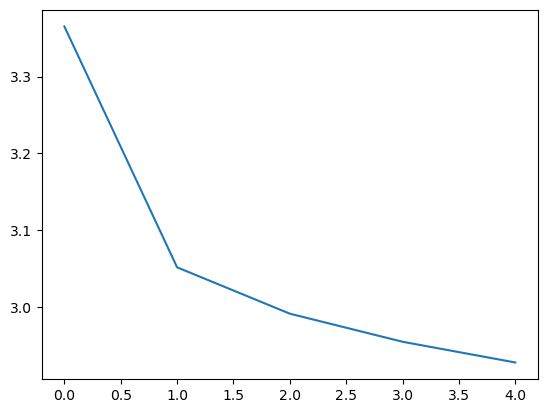

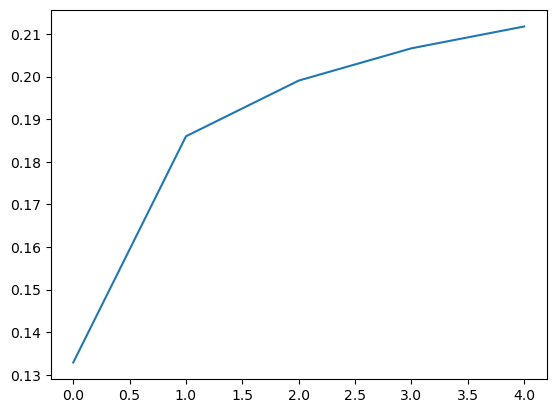

In [23]:
loss = NotesModel.history.history['loss']
accuracy = NotesModel.history.history['accuracy']
plt.figure()
plt.plot(range(len(loss)), loss)
plt.figure()
plt.plot(range(len(accuracy)), accuracy)